In [2]:
#Load the necessary python libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('breast-cancer.data',sep=',',header=None)
df.columns=['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
df.head(5)
df_test=df['Class']

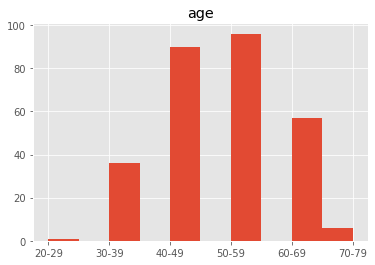

<Figure size 432x288 with 0 Axes>

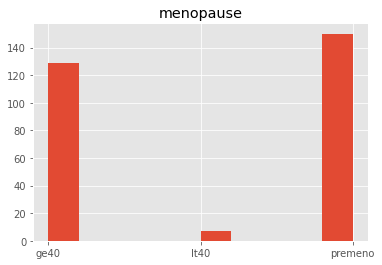

<Figure size 432x288 with 0 Axes>

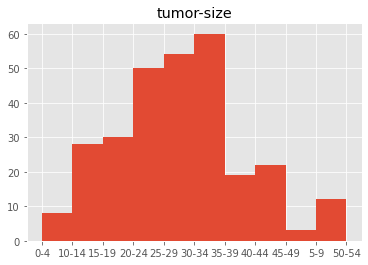

<Figure size 432x288 with 0 Axes>

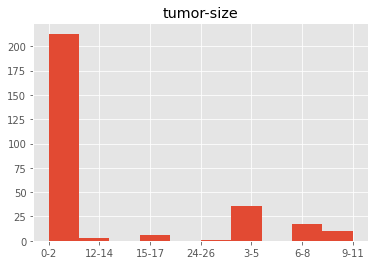

<Figure size 432x288 with 0 Axes>

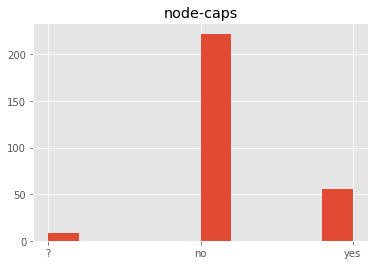

<Figure size 432x288 with 0 Axes>

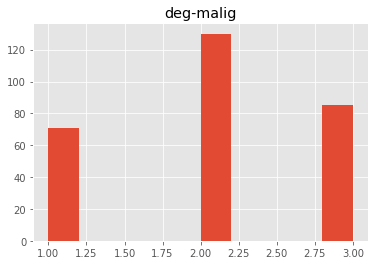

<Figure size 432x288 with 0 Axes>

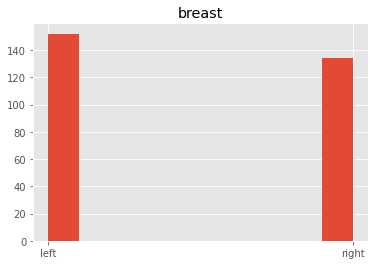

<Figure size 432x288 with 0 Axes>

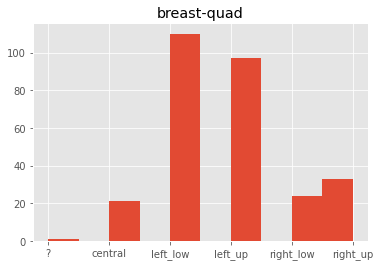

<Figure size 432x288 with 0 Axes>

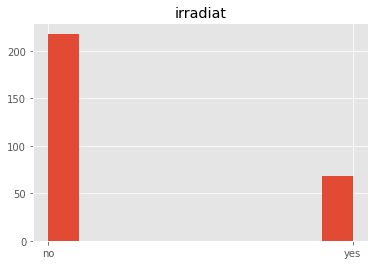

<Figure size 432x288 with 0 Axes>

In [3]:
l=['Class','age','menopause','tumor-size','tumor-size','node-caps','deg-malig','breast','breast-quad','irradiat']
for i in range(1,10):
    plt.figure(figsize=(6.0,4.0))
    plt.title(label=l[i])
    plt.hist(sorted(df.iloc[:,i]))
    plt.show()
    plt.clf()

Preprocess data and convert data features into digital types
age:
    [20,29]=2,[30,39]=3,[40,49]=4,[50,59]=5,[60,69]=6,[70,79]=7;
menopause:
    ge40=0,It40=1,premeno=2;
tumor-size:
    [0,4]=0, [4,10]=4, [10,14]=10, [15,19]=15, [20,24]=20, [25,29]=25, [30,34]=30, [35,39]=35, [40,44]=40, [45,49]=45, [50,54]=50, [55,59]=55
...



In [4]:
ls=['age','tumor-size','inv-nodes','node-caps']
for k in range(0,3):
#    print(ls[k])
    for i in range(0,df[ls[k]].size):
        df.loc[i,ls[k]]= df.loc[i,ls[k]].split('-')[0]
#        print(df.loc[i,ls[k]])
for i in range(0,df['menopause'].size):
    if df['menopause'][i]=='ge40':
        df.loc[i,'menopause']=0
    elif df['menopause'][i]=='It40' :
        df.loc[i,'menopause']=1
    else:
        df.loc[i,'menopause']=2
for i in range(0,df['node-caps'].size):
    if df['node-caps'][i]=='no':
        df.loc[i,'node-caps']=0
    else:
        df.loc[i,'node-caps']=1
for i in range(0,df['breast'].size):
    if df['breast'][i]=='left':
        df.loc[i,'breast']=0
    else:
        df.loc[i,'breast']=1
for i in range(0,df['breast-quad'].size):
    if df['breast-quad'][i]=='central':
        df.loc[i,'breast-quad']=0
    elif df['breast-quad'][i]=='left_low':
        df.loc[i,'breast-quad']=1
    elif df['breast-quad'][i]=='left_up':
        df.loc[i,'breast-quad']=2
    elif df['breast-quad'][i]=='right_low':
        df.loc[i,'breast-quad']=3
    else:
        df.loc[i,'breast-quad']=4
for i in range(0,df['irradiat'].size):
    if df['irradiat'][i]=='no':
        df.loc[i,'irradiat']=0
    else:
        df.loc[i,'irradiat']=1
df.head(5)


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30,2,30,0,0,3,0,1,0
1,no-recurrence-events,40,2,20,0,0,2,1,4,0
2,no-recurrence-events,40,2,20,0,0,2,0,1,0
3,no-recurrence-events,60,0,15,0,0,2,1,2,0
4,no-recurrence-events,40,2,0,0,0,2,1,3,0


We use age as X and tumor-size as y to draw scatter plot matrix of features

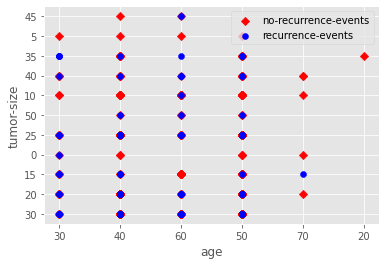

In [5]:
#print(df['age'][df.Class=='no-recurrence-events'])
plt.scatter(df['age'][df.Class=='no-recurrence-events'].array,
            df['tumor-size'][df.Class=='no-recurrence-events'].array,
           marker='D',
           color='red',
           label='no-recurrence-events')
plt.scatter(df['age'][df.Class=='recurrence-events'].array,
            df['tumor-size'][df.Class=='recurrence-events'].array,
           marker='o',
           color='blue',
           label='recurrence-events')
plt.xlabel('age')
plt.ylabel('tumor-size')
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
#feature_name = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
#X = df.drop('Class',axis=1).values
X = df.drop(['Class','breast','breast-quad','inv-nodes','menopause'],axis=1).values
y = df['Class'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [19]:
from sklearn import tree
DecisionTreeObj = tree.DecisionTreeClassifier(criterion="gini", random_state=30, splitter="random",max_depth=11)
DecisionTreeObj = DecisionTreeObj.fit(X_train, y_train)
score = DecisionTreeObj.score(X_test, y_test)
print("test_score：",score)

score = DecisionTreeObj.score(X_train, y_train)
print("train_score：",score)

test_score： 0.7652173913043478
train_score： 0.9064327485380117


[Text(0.6622007238307349, 0.9583333333333334, 'X[2] <= 0.9\ngini = 0.418\nsamples = 286\nvalue = [201, 85]'),
 Text(0.47918986636971045, 0.875, 'X[4] <= 0.256\ngini = 0.354\nsamples = 222\nvalue = [171, 51]'),
 Text(0.31361358574610243, 0.7916666666666666, 'X[3] <= 2.689\ngini = 0.316\nsamples = 188\nvalue = [151, 37]'),
 Text(0.16174832962138086, 0.7083333333333334, 'X[3] <= 1.925\ngini = 0.263\nsamples = 148\nvalue = [125, 23]'),
 Text(0.062360801781737196, 0.625, 'X[0] <= 36.562\ngini = 0.2\nsamples = 62\nvalue = [55, 7]'),
 Text(0.017817371937639197, 0.5416666666666666, 'X[1] <= 13.995\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.008908685968819599, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.026726057906458798, 0.4583333333333333, 'X[1] <= 18.113\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.017817371937639197, 0.375, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.035634743875278395, 0.375, 'X[1] <= 33.717\ngini = 0.444\nsamples = 3

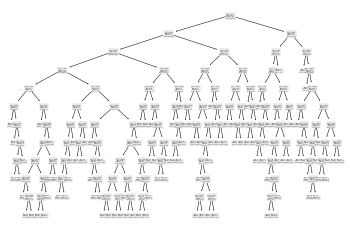

In [8]:
tree.plot_tree(DecisionTreeObj.fit(X, y))

feature_name： ['age', 'tumor-size', 'node-caps', 'deg-malig', 'irradiat']
feature_num： 5


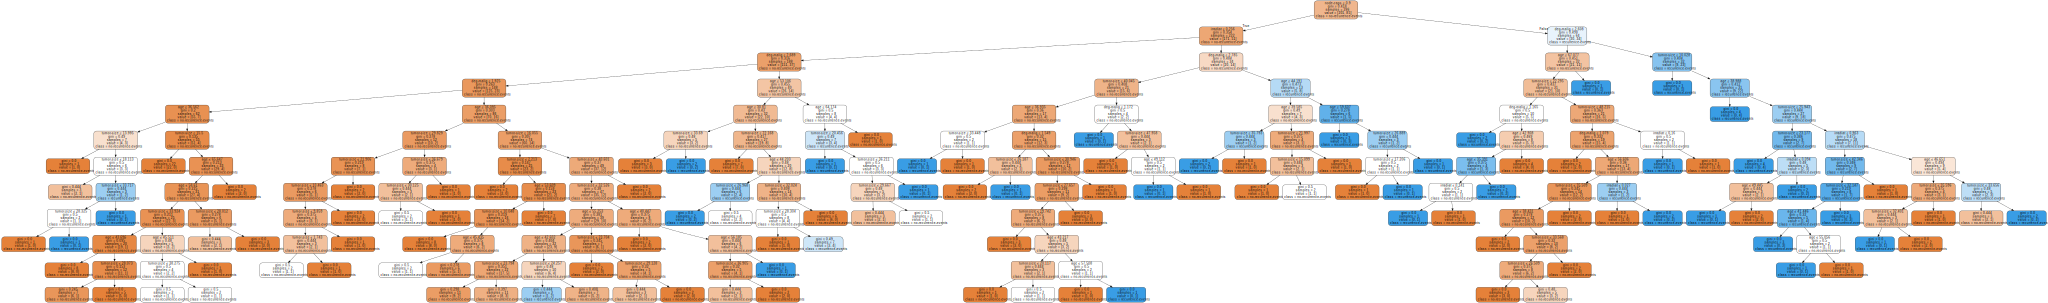

In [10]:
# conda install graphviz
import graphviz

#feature_name = ['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat']
feature_name = ['age','tumor-size','node-caps','deg-malig','irradiat']
print("feature_name：", feature_name)
print("feature_num：", len(feature_name))
DecisionTreeObj
dot_data = tree.export_graphviz(DecisionTreeObj, out_file=None,
                                feature_names=feature_name,
                                class_names=['no-recurrence-events', 'recurrence-events'],
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

I adjusted the columns as characteristic attributes and found these properties (age,tumor-size,node-caps,deg-malig,irradiat).
It has the greatest impact on classification.